# Time Series:

# Auto Regressive Model: [AR model]

### importing libraries:

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

### Reading and Understanding Data:

In [2]:
df = pd.read_csv('airline-passenger-traffic.csv',header=None)

In [3]:
df.columns = ['Months','Passengers']

In [4]:
df.head()

,Months,Passengers
0,1949-01,112.0
1,1949-02,118.0
2,1949-03,132.0
3,1949-04,129.0
4,1949-05,121.0


In [5]:
df.shape

(144, 2)

In [6]:
df.describe()

,Passengers
count,140.000000
mean,280.735714
std,120.593235
min,104.000000
25%,180.000000
50%,268.000000
75%,360.500000
max,622.000000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Months      144 non-null    object 
 1   Passengers  140 non-null    float64
dtypes: float64(1), object(1)
memory usage: 2.4+ KB


In [8]:
df.dtypes

Months         object
Passengers    float64
dtype: object

### Converting into DateTime Series:

In [9]:
df['Months'] = pd.to_datetime(df['Months'],format='%Y-%m')

In [10]:
df.dtypes

Months        datetime64[ns]
Passengers           float64
dtype: object

In [11]:
df =  df.set_index('Months')

In [12]:
df.head()

,Passengers
Months,
1949-01-01,112.0
1949-02-01,118.0
1949-03-01,132.0
1949-04-01,129.0
1949-05-01,121.0


## Time Series Analysis:

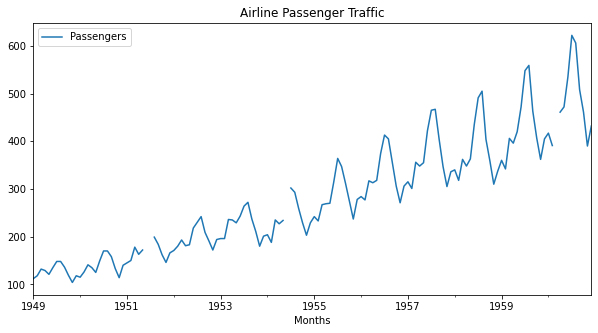

In [13]:
# plottig time series data:

df.plot(figsize=(10,5))
plt.title('Airline Passenger Traffic')
plt.show()

## Missing Value Treatment:

### using interpolate method:

In [14]:
df['Passengers'].fillna(df['Passengers'].interpolate(method='linear'),inplace=True)

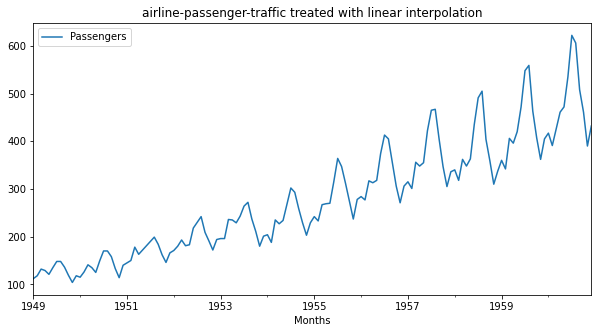

In [15]:
df.plot(figsize=(10,5))
plt.title('airline-passenger-traffic treated with linear interpolation')
plt.show()

## Outliers detection:

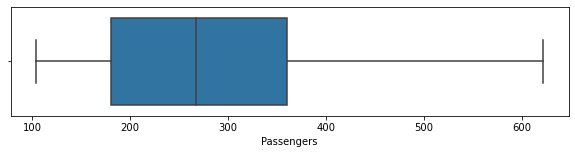

In [16]:
# boxplot:

plot=plt.subplots(figsize=(10,2))
box_plot = sns.boxplot(x=df['Passengers'],whis=1.5)

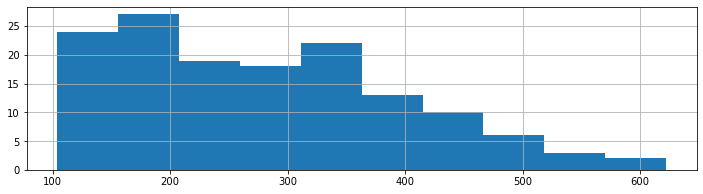

In [17]:
# histogram:

plot = df['Passengers'].hist(figsize=(12,3))

## Time Series Decomposition:

### Additive:

In [18]:
from statsmodels.api import tsa

<Figure size 720x360 with 0 Axes>

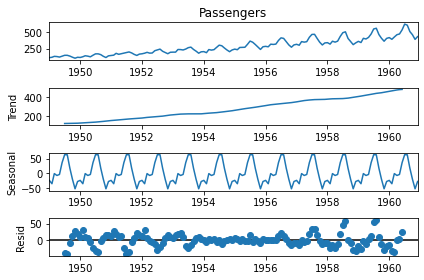

In [19]:
plt.figure(figsize=(10,5))
dc = tsa.seasonal_decompose(df['Passengers'], model='additive')
dc.plot()
plt.show()

### Multiplicative:

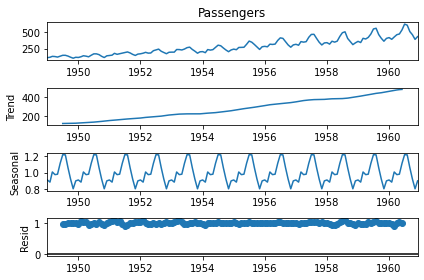

In [20]:
# multiplicative:

dc = tsa.seasonal_decompose(df['Passengers'],model= 'multplicative')
dc.plot()
plt.show()

## 1- Stationary:

### Augmented Dickey-Fuller Test [ADF]:

In [21]:
from statsmodels.tsa.stattools import adfuller

In [22]:
adf_test = adfuller(df['Passengers'])

In [23]:
ADF_statistic = adf_test[0]
ADF_statistic

0.894608794082385

In [24]:
critical_values=adf_test[4]
critical_values

{'1%': -3.4816817173418295,
 '5%': -2.8840418343195267,
 '10%': -2.578770059171598}

In [25]:
p_value = adf_test[1]
p_value

0.9930195647605924

### Observation:
- as p-value > 0.05 we can not reject null hypothesis
- Thus the series is not stationary

## Kwiatkowski Phillips Schmidt Shin (KPSS):

In [26]:
from statsmodels.tsa.stattools import kpss

In [27]:
kpss_test = kpss(df['Passengers'])

C:\Users\Swati Nikhil Lathiya\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1906: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  warnings.warn(


In [28]:
KPSS_statistic = kpss_test[0]
KPSS_statistic

1.0520501504573108

In [29]:
critical_values = kpss_test[3]
critical_values

{'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739}

In [30]:
p_value = kpss_test[1]
p_value

0.01

### Observation:
- as p-value < 0.05 we fail to reject null hypothesis
- Thus the series is not stationary

## BoxCox Transformation:

In [31]:
# if variance is not constant we should use boxcox to make it constant.

In [32]:
from scipy.stats import boxcox

In [33]:
df['boxcox'] = boxcox(df['Passengers'],lmbda=0)

In [34]:
df.index=df.index

In [35]:
df.head()

,Passengers,boxcox
Months,,
1949-01-01,112.0,4.718499
1949-02-01,118.0,4.770685
1949-03-01,132.0,4.882802
1949-04-01,129.0,4.859812
1949-05-01,121.0,4.795791


In [36]:
# checking stationary:

adf_test = adfuller(df['boxcox'])

In [37]:
adf_test[1]

0.4280285718952773

### Observation of adf test after transformation using box cox:
- as p-value > 0.05 we can not reject null hypothesis
- Thus the series is not stationary

## Differencing:

In [38]:
df['boxcox_diff'] = (df['boxcox'] - df['boxcox'].shift())

In [39]:
df.head()

,Passengers,boxcox,boxcox_diff
Months,,,
1949-01-01,112.0,4.718499,NaN
1949-02-01,118.0,4.770685,0.052186
1949-03-01,132.0,4.882802,0.112117
1949-04-01,129.0,4.859812,-0.022990
1949-05-01,121.0,4.795791,-0.064022


In [40]:
df.dropna(inplace=True)

In [41]:
df.head()

,Passengers,boxcox,boxcox_diff
Months,,,
1949-02-01,118.0,4.770685,0.052186
1949-03-01,132.0,4.882802,0.112117
1949-04-01,129.0,4.859812,-0.022990
1949-05-01,121.0,4.795791,-0.064022
1949-06-01,135.0,4.905275,0.109484


In [42]:
# checking stationary on transformed and  differencing :

adf_test = adfuller(df['boxcox_diff'])

In [43]:
adf_test[1]

0.015326212237944533

### Observation of adf test after transformed and differencing series:
- as p-value > 0.05 we can not reject null hypothesis
- Thus the series is stationary

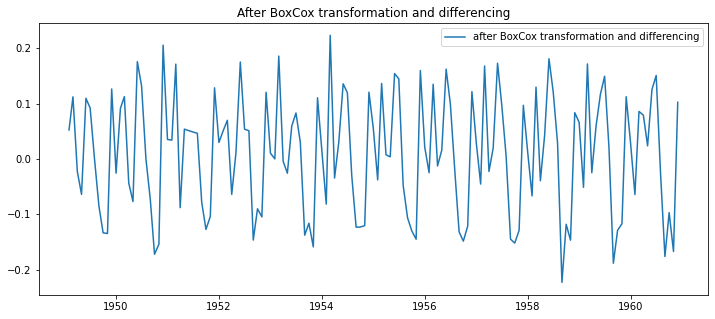

In [44]:
plt.figure(figsize=(12,5))
plt.plot(df['boxcox_diff'], label='after BoxCox transformation and differencing')
plt.title('After BoxCox transformation and differencing')
plt.legend(loc='best')
plt.show()

## 2- Autocorrelation:

## Autocorrelation Function (ACF)

In [45]:
from statsmodels.graphics.tsaplots import plot_acf

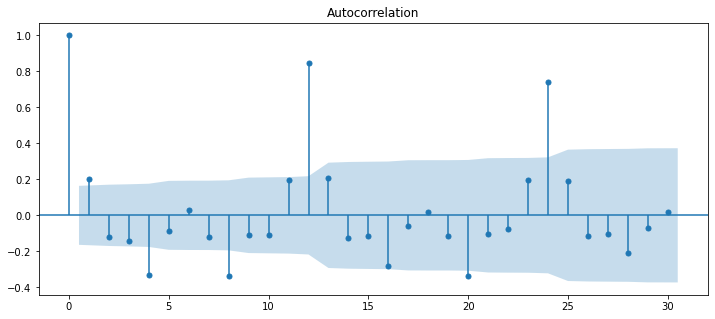

In [46]:
plt.figure(figsize=(12,5))
plot_acf(df['boxcox_diff'],ax=plt.gca(), lags=30)
plt.show()

In [47]:
train_len = 120
train = df['boxcox_diff'][:train_len]
test = df['boxcox_diff'][train_len:]

In [48]:
train.shape

(120,)

In [49]:
test.shape

(23,)

# --AR model:

In [50]:
from statsmodels.tsa.arima_model import ARIMA  # AR order = (1,0,0)

In [51]:
# fitting the AR model:

AR_model = ARIMA(train, order=(1,0,0))

C:\Users\Swati Nikhil Lathiya\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


In [52]:
AR_model = AR_model.fit()

In [53]:
AR_model.params

const                0.009917
ar.L1.boxcox_diff    0.185546
dtype: float64

In [54]:
y_pred_AR = AR_model.predict(test.index.min(),(test.index.max()))

In [55]:
y_pred_AR

1959-02-01    0.020327
1959-03-01    0.011848
1959-04-01    0.010275
1959-05-01    0.009983
1959-06-01    0.009929
1959-07-01    0.009919
1959-08-01    0.009917
1959-09-01    0.009917
1959-10-01    0.009917
1959-11-01    0.009917
1959-12-01    0.009917
1960-01-01    0.009917
1960-02-01    0.009917
1960-03-01    0.009917
1960-04-01    0.009917
1960-05-01    0.009917
1960-06-01    0.009917
1960-07-01    0.009917
1960-08-01    0.009917
1960-09-01    0.009917
1960-10-01    0.009917
1960-11-01    0.009917
1960-12-01    0.009917
Freq: MS, dtype: float64

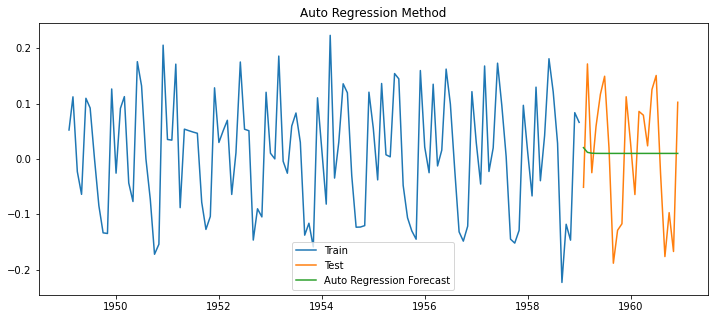

In [56]:
plt.figure(figsize=(12,5))
plt.plot(train, label='Train')
plt.plot(test, label='Test')
plt.plot(y_pred_AR, label='Auto Regression Forecast')
plt.title('Auto Regression Method')
plt.legend(loc='best')
plt.show()

### Calculating RMSE and MAPE:

In [57]:
from sklearn.metrics import mean_squared_error

In [58]:
# RMSE:

mse = mean_squared_error(test,y_pred_AR)
mse

0.01250064617303408

In [59]:
rmse = np.sqrt(mse)
rmse

0.11180628861130344

In [60]:
# upto 2 decimal point:

rmse = rmse.round(2)
rmse

0.11

In [61]:
# MAPE:

error = test-y_pred_AR
abs_error = np.abs(error)

In [62]:
per_abs_error = (abs_error/test)*100

In [63]:
mape = np.mean(per_abs_error)
mape=np.round(mape,2)
mape

-4.33

# --MA model:

In [64]:
# fitting the AR model: [0,0,1]

MA_model = ARIMA(train, order=(0,0,1))

C:\Users\Swati Nikhil Lathiya\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


In [65]:
MA_model = MA_model.fit()

In [66]:
MA_model.params

const                0.009821
ma.L1.boxcox_diff    0.270519
dtype: float64

In [67]:
y_pred_MA = MA_model.predict(test.index.min(),(test.index.max()))

In [68]:
y_pred_MA

1959-02-01    0.016879
1959-03-01    0.009821
1959-04-01    0.009821
1959-05-01    0.009821
1959-06-01    0.009821
1959-07-01    0.009821
1959-08-01    0.009821
1959-09-01    0.009821
1959-10-01    0.009821
1959-11-01    0.009821
1959-12-01    0.009821
1960-01-01    0.009821
1960-02-01    0.009821
1960-03-01    0.009821
1960-04-01    0.009821
1960-05-01    0.009821
1960-06-01    0.009821
1960-07-01    0.009821
1960-08-01    0.009821
1960-09-01    0.009821
1960-10-01    0.009821
1960-11-01    0.009821
1960-12-01    0.009821
Freq: MS, dtype: float64

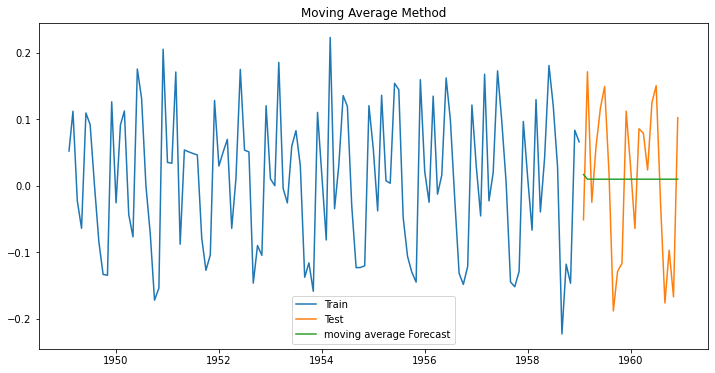

In [69]:
plt.figure(figsize=(12,6))
plt.plot(train, label='Train')
plt.plot(test, label='Test')
plt.plot(y_pred_MA, label='moving average Forecast')
plt.title('Moving Average Method')
plt.legend(loc='best')
plt.show()

### Calculate RMSE and MAPE:

In [70]:
# RMSE:

mse = mean_squared_error(test,y_pred_MA)
mse

0.012506147870685054

In [71]:
rmse = np.sqrt(mse)
rmse

0.1118308896087528

In [72]:
# upto 2 decimal point:

rmse = rmse.round(2)
rmse

0.11

In [73]:
# MAPE:

error = test-y_pred_MA
abs_error = np.abs(error)

In [74]:
per_abs_error = (abs_error/test)*100

In [75]:
mape = np.mean(per_abs_error)
mape=np.round(mape,2)
mape

-3.77

# --ARMA model:

In [76]:
# fitting the AR model:(1,0,1)

ARMA_model = ARIMA(train, order=(1,0,1))

C:\Users\Swati Nikhil Lathiya\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


In [77]:
ARMA_model = ARMA_model.fit()

In [78]:
ARMA_model.params

const                0.009583
ar.L1.boxcox_diff   -0.527564
ma.L1.boxcox_diff    0.798209
dtype: float64

In [79]:
y_pred_ARMA = ARMA_model.predict(test.index.min(),(test.index.max()))

In [80]:
y_pred_ARMA

1959-02-01   -0.023402
1959-03-01    0.026985
1959-04-01    0.000403
1959-05-01    0.014426
1959-06-01    0.007028
1959-07-01    0.010931
1959-08-01    0.008872
1959-09-01    0.009958
1959-10-01    0.009385
1959-11-01    0.009688
1959-12-01    0.009528
1960-01-01    0.009612
1960-02-01    0.009568
1960-03-01    0.009591
1960-04-01    0.009579
1960-05-01    0.009585
1960-06-01    0.009582
1960-07-01    0.009584
1960-08-01    0.009583
1960-09-01    0.009583
1960-10-01    0.009583
1960-11-01    0.009583
1960-12-01    0.009583
Freq: MS, dtype: float64

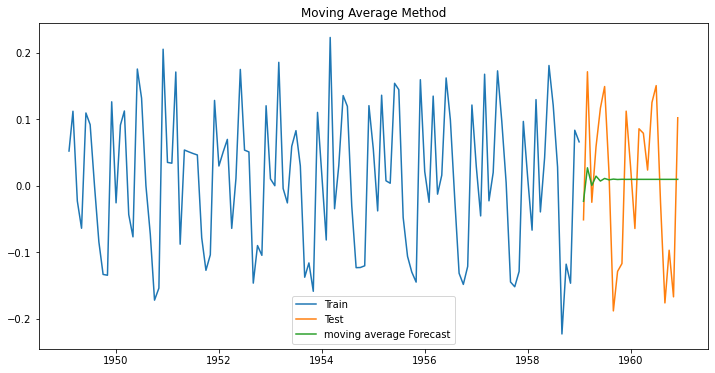

In [81]:
plt.figure(figsize=(12,6))
plt.plot(train, label='Train')
plt.plot(test, label='Test')
plt.plot(y_pred_ARMA, label='moving average Forecast')
plt.title('Moving Average Method')
plt.legend(loc='best')
plt.show()

### Calculate RMSE and MAPE:

In [82]:
# RMSE:

mse = mean_squared_error(test,y_pred_ARMA)
mse

0.01207679400481645

In [83]:
rmse = np.sqrt(mse)
rmse

0.10989446758056771

In [84]:
# upto 2 decimal point:

rmse = rmse.round(2)
rmse

0.11

In [85]:
# MAPE:

error = test-y_pred_ARMA
abs_error = np.abs(error)

In [86]:
per_abs_error = (abs_error/test)*100

In [87]:
mape = np.mean(per_abs_error)
mape=np.round(mape,2)
mape

1.02

# --ARIMA model:

In [88]:
# fitting the AR model:(1,1,1)

ARIMA_model = ARIMA(train, order=(1,1,1))

C:\Users\Swati Nikhil Lathiya\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\Swati Nikhil Lathiya\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


In [89]:
ARIMA_model = ARIMA_model.fit()

In [90]:
ARIMA_model.params

const                 -0.000108
ar.L1.D.boxcox_diff    0.194382
ma.L1.D.boxcox_diff   -0.999961
dtype: float64

In [91]:
# predict the model:

y_pred_ARIMA = ARIMA_model.predict(test.index.min(),(test.index.max()))

In [92]:
y_pred_ARIMA

1959-02-01   -0.050871
1959-03-01   -0.009975
1959-04-01   -0.002026
1959-05-01   -0.000481
1959-06-01   -0.000181
1959-07-01   -0.000122
1959-08-01   -0.000111
1959-09-01   -0.000109
1959-10-01   -0.000108
1959-11-01   -0.000108
1959-12-01   -0.000108
1960-01-01   -0.000108
1960-02-01   -0.000108
1960-03-01   -0.000108
1960-04-01   -0.000108
1960-05-01   -0.000108
1960-06-01   -0.000108
1960-07-01   -0.000108
1960-08-01   -0.000108
1960-09-01   -0.000108
1960-10-01   -0.000108
1960-11-01   -0.000108
1960-12-01   -0.000108
Freq: MS, dtype: float64

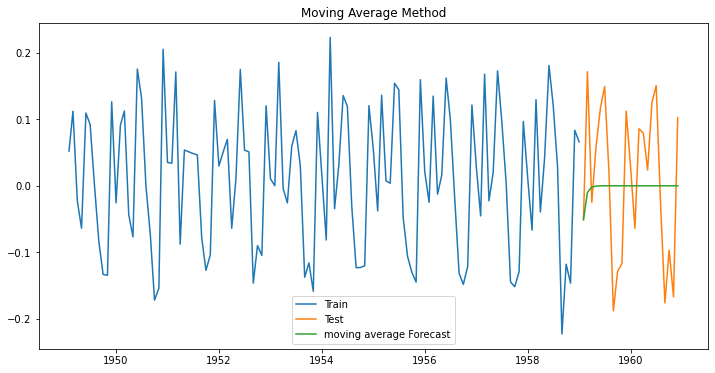

In [93]:
plt.figure(figsize=(12,6))
plt.plot(train, label='Train')
plt.plot(test, label='Test')
plt.plot(y_pred_ARIMA, label='moving average Forecast')
plt.title('Moving Average Method')
plt.legend(loc='best')
plt.show()

### Calculate RMSE and MAPE:

In [94]:
# RMSE:

mse = mean_squared_error(test,y_pred_ARIMA)
mse

0.012563908438880469

In [95]:
rmse = np.sqrt(mse)
rmse

0.11208884172334224

In [96]:
# upto 2 decimal point:

rmse = rmse.round(2)
rmse

0.11

In [97]:
# MAPE:

error = test-y_pred_ARIMA
abs_error = np.abs(error)

In [98]:
per_abs_error = (abs_error/test)*100

In [99]:
mape = np.mean(per_abs_error)
mape=np.round(mape,2)
mape

18.14

# --SARIMA model:

In [100]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [101]:
SARIMA_model = SARIMAX(train, order=(1,1,1), seasonal_order=(1,1,1,12))

C:\Users\Swati Nikhil Lathiya\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\Swati Nikhil Lathiya\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


In [102]:
SARIMA_model = SARIMA_model.fit()

C:\Users\Swati Nikhil Lathiya\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [103]:
SARIMA_model.params

ar.L1      -0.252333
ma.L1      -0.990208
ar.S.L12   -0.067463
ma.S.L12   -0.490809
sigma2      0.001475
dtype: float64

In [104]:
y_pred_SARIMA = SARIMA_model.predict(test.index.min(),(test.index.max()))

In [105]:
y_pred_SARIMA

1959-02-01   -0.063186
1959-03-01    0.147135
1959-04-01   -0.029262
1959-05-01    0.026466
1959-06-01    0.168800
1959-07-01    0.110135
1959-08-01    0.006579
1959-09-01   -0.174782
1959-10-01   -0.134032
1959-11-01   -0.137999
1959-12-01    0.099159
1960-01-01    0.039250
1960-02-01   -0.058327
1960-03-01    0.143939
1960-04-01   -0.030164
1960-05-01    0.026859
1960-06-01    0.169065
1960-07-01    0.110292
1960-08-01    0.007455
1960-09-01   -0.178622
1960-10-01   -0.133534
1960-11-01   -0.139167
1960-12-01    0.097526
Freq: MS, Name: predicted_mean, dtype: float64

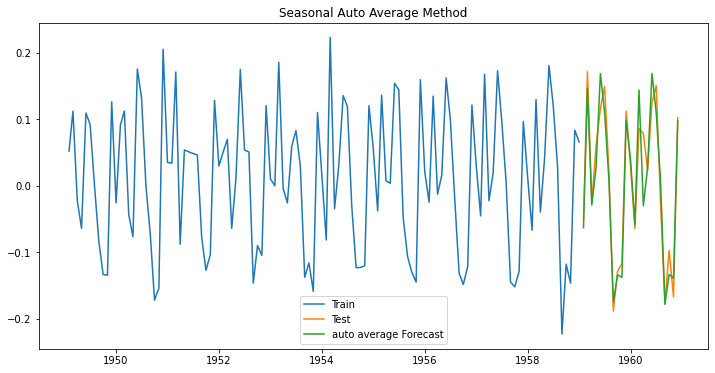

In [106]:
plt.figure(figsize=(12,6))
plt.plot(train, label='Train')
plt.plot(test, label='Test')
plt.plot(y_pred_SARIMA, label='auto average Forecast')
plt.title('Seasonal Auto Average Method')
plt.legend(loc='best')
plt.show()

### Calculate RMSE and MAPE:

In [107]:
# RMSE:

rmse = np.sqrt(mean_squared_error(test,y_pred_SARIMA)).round(2)
rmse

0.04

In [109]:
mape = np.round(np.mean(np.abs(test-y_pred_SARIMA)/test)*100,2)
mape

12.01